In [34]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [35]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [36]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [37]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1

In [38]:
train,test

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709],
        [0.05598456],
        [0.01930502],
        [0.06949806],
        [0.07915059],
        [0.08880308],
        [0.14285713],
        [0.11389962],
        [0.13127413],
        [0.14285713],
        [0.18339768],
        [0.18339768],
        [0.15444016],
        [0.11196911],
        [0.08108109],
        [0.1196911 ],
        [0.12934363],
        [0.14671814],
        [0.17181468],
        [0.14864865],
        [0.15250966],
        [0.22007722],
        [0.24324325],
        [0.26640925],
        [0.2027027 ],
        [0

In [39]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [40]:
trainY.shape,trainX.shape

((94,), (94, 1))

In [41]:
trainX, trainY

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709],
        [0.05598456],
        [0.01930502],
        [0.06949806],
        [0.07915059],
        [0.08880308],
        [0.14285713],
        [0.11389962],
        [0.13127413],
        [0.14285713],
        [0.18339768],
        [0.18339768],
        [0.15444016],
        [0.11196911],
        [0.08108109],
        [0.1196911 ],
        [0.12934363],
        [0.14671814],
        [0.17181468],
        [0.14864865],
        [0.15250966],
        [0.22007722],
        [0.24324325],
        [0.26640925],
        [0.2027027 ],
        [0

In [42]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
trainX

array([[[0.01544401]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984557]],

       [[0.08494207]],

       [[0.08494207]],

       [[0.06177607]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123553]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984557]],

       [[0.04054055]],

       [[0.08687258]],

       [[0.12741312]],

       [[0.12741312]],

       [[0.10424709]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949806]],

       [[0.07915059]],

       [[0.08880308]],

       [[0.14285713]],

       [[0.11389962]],

       [[0.13127413]],

       [[0.14285713]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444016]],

       [[0.11196911]],

       [[0.08108109]],

       [[0.1196911 ]],

       [[0.12934363]],

       [[0.14671814]],

       [[0.17181468]],

       [[0.14864865]],

       [[0.15250966]],

       [[0.22007

In [44]:
trainX.shape

(94, 1, 1)

In [45]:
trainY

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557,
       0.04054055, 0.08687258, 0.12741312, 0.12741312, 0.10424709,
       0.05598456, 0.01930502, 0.06949806, 0.07915059, 0.08880308,
       0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768,
       0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911 ,
       0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966,
       0.22007722, 0.24324325, 0.26640925, 0.2027027 , 0.16795367,
       0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625,
       0.25289574, 0.24131274, 0.26833975, 0.3088803 , 0.32432434,
       0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018,
       0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803 ,
       0.38223937, 0.36486486, 0.2992278 , 0.24131274, 0.1911197 ,
       0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.31853

In [46]:
trainY.shape

(94,)

Epoch 1/100
94/94 - 2s - loss: 0.0353 - 2s/epoch - 23ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0167 - 208ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0125 - 213ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0114 - 208ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0105 - 201ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0095 - 215ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0087 - 219ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0078 - 208ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0071 - 174ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0062 - 236ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0055 - 209ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0048 - 222ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0042 - 197ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0037 - 191ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0033 - 219ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0030 - 231ms/epoc

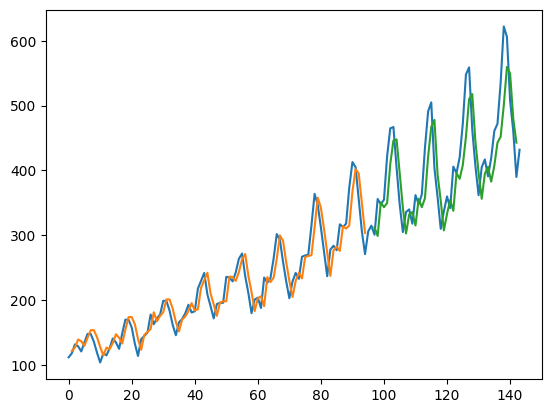

In [28]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()